<a href="https://colab.research.google.com/github/tselest/ML_DL_projects/blob/main/LoanPayments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
info_club = pd.read_csv('/content/gdrive/MyDrive/data/lending_club_info.csv', index_col='LoanStatNew')

In [4]:
info_club

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [5]:
for index, row in info_club.iterrows():
  print(index + ": " + row['Description'])

loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term: The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate: Interest Rate on the loan
installment: The monthly payment owed by the borrower if the loan originates.
grade: LC assigned loan grade
sub_grade: LC assigned loan subgrade
emp_title: The job title supplied by the Borrower when applying for the loan.*
emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
annual_inc: The self-reported annual income provided by the borrower during registration.
verification_status: Indicates if income was verified by LC, not v

In [6]:
loan = pd.read_csv('/content/gdrive/MyDrive/data/lending_club_loan_two.csv')

In [7]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## 1. Exploratory Data Analysis

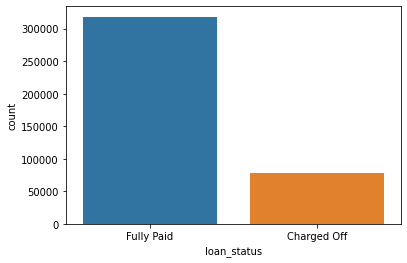

In [9]:
# countplot for the loan status (fully paid vs charged off)

sns.countplot(x='loan_status', data=loan)

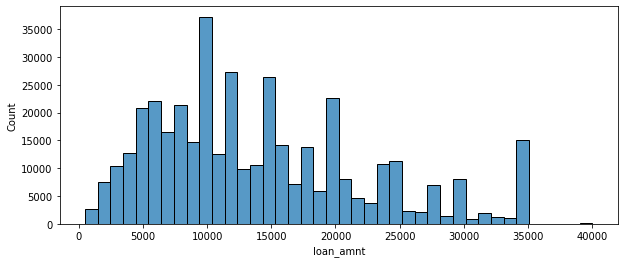

In [10]:
plt.figure(figsize=(10,4))
sns.histplot(data=loan, x='loan_amnt', bins=40)

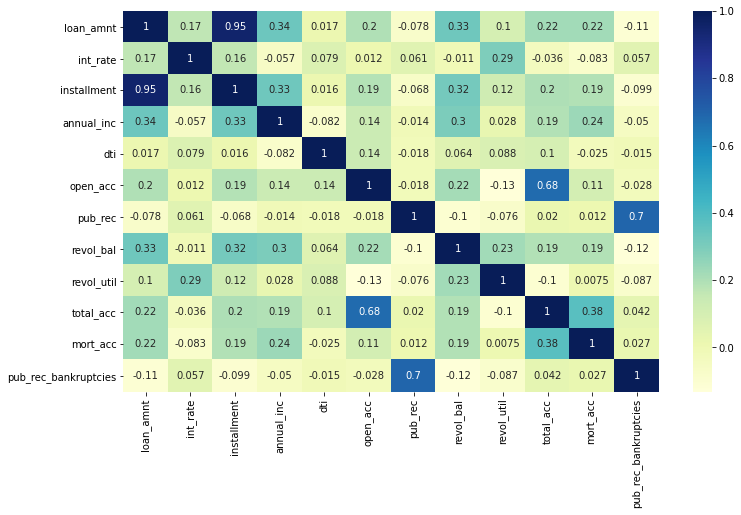

In [11]:
# exploring correlation between continuous feature variables

corr = loan.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, cmap='YlGnBu')

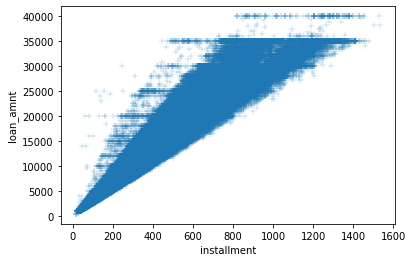

In [12]:
sns.scatterplot(x = 'installment', 
                y='loan_amnt', 
                data=loan, 
                alpha=0.4, 
                marker="+")

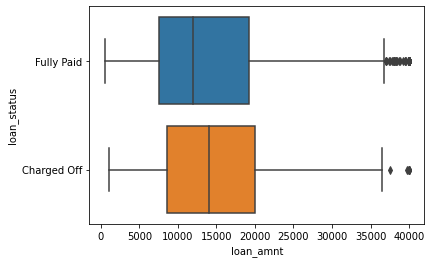

In [13]:
sns.boxplot(x='loan_amnt', y='loan_status',data=loan)

In [14]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [15]:
print(sorted(loan['grade'].unique()))
print('\n')
print(sorted(loan['sub_grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


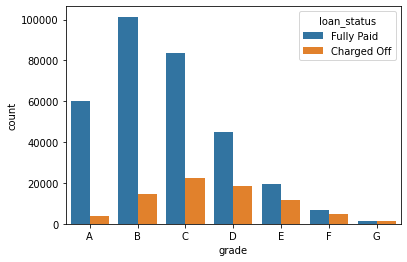

In [16]:
sns.countplot(x='grade', 
              data=loan, 
              hue='loan_status', 
              order = sorted(loan['grade'].unique()))

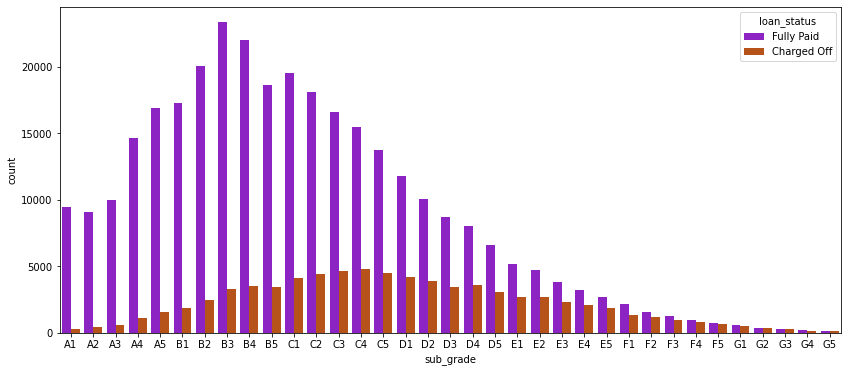

In [17]:
sub_sort = sorted(loan['sub_grade'].unique())

plt.figure(figsize=(14,6))
sns.countplot(x='sub_grade', 
              data=loan, 
              hue='loan_status',
              palette='gnuplot',
              order=sub_sort)

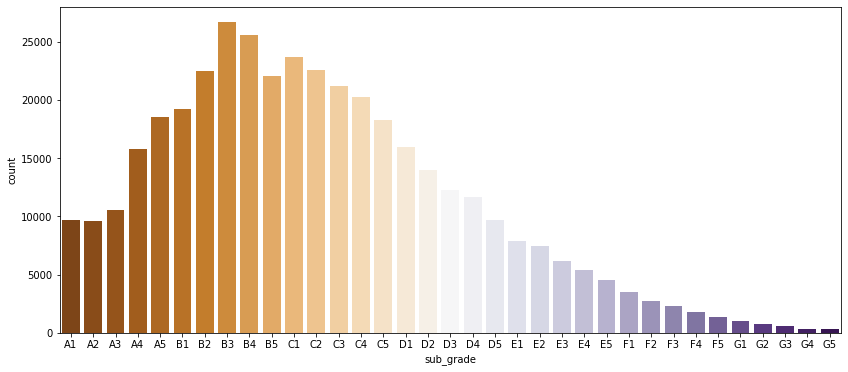

In [18]:
plt.figure(figsize=(14,6))
sns.countplot(x='sub_grade', 
              data=loan, 
              palette='PuOr',
              order=sub_sort)

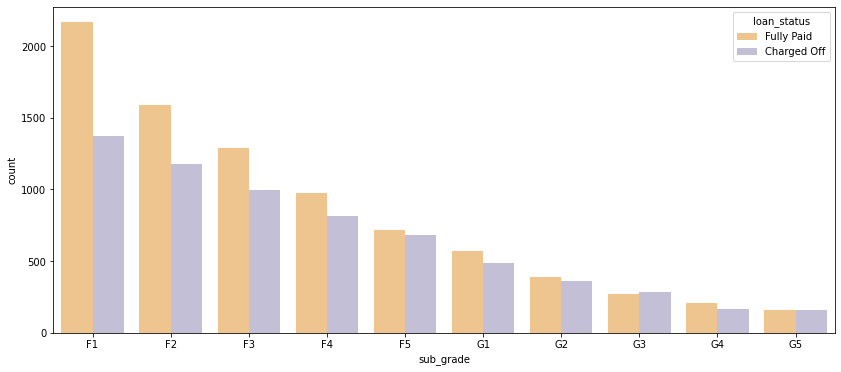

In [19]:
fg_sub = loan[(loan['grade']=='F') | (loan['grade']=='G')]
sub_order = sorted(fg_sub['sub_grade'].unique())

plt.figure(figsize=(14,6))
sns.countplot(x='sub_grade', 
              data=fg_sub, 
              palette='PuOr',
              hue='loan_status',
              order=sub_order)

In [20]:
loan['loan_repaid'] = loan['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [21]:
loan[['loan_status', 'loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


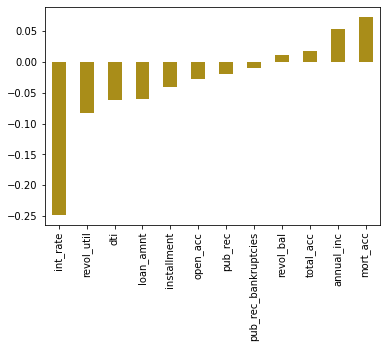

In [22]:
loan.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar', color='#a98d19')

## 2. Data Preprocessing

### 2.1 Missing Data

In [23]:
len(loan)

396030

In [24]:
100 * loan.isnull().sum()/len(loan)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [25]:
loan['emp_title'].nunique()

173105

In [26]:
loan['emp_title'].value_counts()

Teacher                        4389
Manager                        4250
Registered Nurse               1856
RN                             1846
Supervisor                     1830
                               ... 
Florida Pest Management           1
logistician                       1
Criminal Justice Specialist       1
Evaluation Consultant             1
Calsense                          1
Name: emp_title, Length: 173105, dtype: int64

In [27]:
loan = loan.drop('emp_title', axis=1)

In [28]:
sorted(loan['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

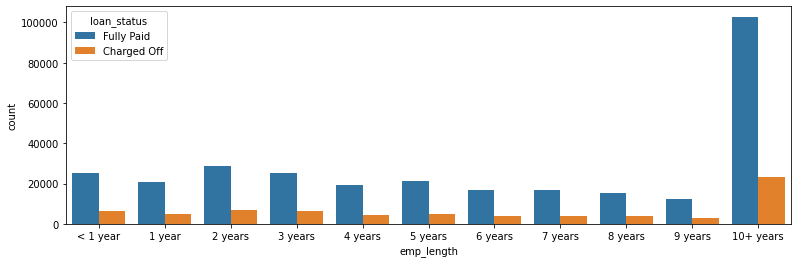

In [29]:
emp_length_order = ['< 1 year', '1 year', '2 years',
                    '3 years','4 years', '5 years',
                    '6 years','7 years','8 years',
                    '9 years','10+ years']

plt.figure(figsize=(13,4))
sns.countplot(x = 'emp_length', data = loan, order = emp_length_order, hue='loan_status')

In [30]:
emp_co = loan[loan['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']
emp_fp = loan[loan['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

emp_co/(emp_co + emp_fp)

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

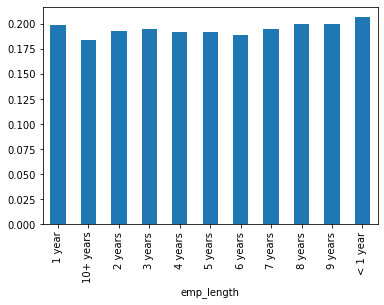

In [31]:
(emp_co/(emp_co + emp_fp)).plot(kind='bar')

In [32]:
loan = loan.drop('emp_length', axis=1)

In [33]:
loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [34]:
loan = loan.drop('title', axis =1)

In [35]:
loan['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [36]:
loan.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [37]:
total_acc_avg = loan.groupby('total_acc').mean()['mort_acc']

def fill_mort_acc(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [38]:
loan['mort_acc'] = loan.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [39]:
loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [40]:
loan = loan.dropna()
loan.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## 2.2 Categorical Variables

In [41]:
# Converting categorical data to numerical by using one-hot-encoding

In [42]:
loan.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [43]:
# term 

loan['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [44]:
loan['term'] = loan['term'].apply(lambda term: int(term[:3]))

In [45]:
loan['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [46]:
# grade is a part of sub_grade so we can just drop it

loan = loan.drop('grade', axis=1)

In [47]:
# converting subgrade to dummy variables

dummies = pd.get_dummies(loan['sub_grade'], drop_first = True)

loan = pd.concat([loan.drop('sub_grade', axis=1), dummies], axis=1)

In [48]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [49]:
# verification status

print(loan['verification_status'].value_counts())
print()
# application type
print('-'*10)
print(loan['application_type'].value_counts())
print()
#initial status
print('-'*10)
print(loan['initial_list_status'].value_counts())
print()
# purpose
print('-'*10)
print(loan['purpose'].value_counts())


Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

----------
INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

----------
f    237346
w    157873
Name: initial_list_status, dtype: int64

----------
debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64


In [50]:
dummies = pd.get_dummies(loan[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first = True)

loan = pd.concat([loan.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1), dummies], axis=1)

In [51]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [52]:
# home ownership

print(loan['home_ownership'].value_counts())
print('-'*10)


# replace none and any with other, i.e. have 110+29+3=142 for the other category
# reduce number of categories, from 6 to 4

loan['home_ownership'] = loan['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
print(loan['home_ownership'].value_counts())


MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64
----------
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64


In [53]:
# converting home ownership into dummy variables

dummies = pd.get_dummies(loan['home_ownership'], drop_first = True)

loan = pd.concat([loan.drop('home_ownership', axis=1), dummies], axis=1)

In [54]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [55]:
# address - extracting the zip code

loan['zip_code'] = loan['address'].apply(lambda x:x[-5:])
print(loan['zip_code'].value_counts()) # just 10 zip codes!


70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64


In [56]:
# converting zip code into dummy variables

dummies = pd.get_dummies(loan['zip_code'], drop_first = True)

loan = pd.concat([loan.drop('zip_code', axis=1), dummies], axis=1)

In [57]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [58]:
# issue_d >>> which month the loan was funded

loan = loan.drop('issue_d', axis=1)

In [59]:
# earliest_cr_line

loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x:int(x[-4:]))
print(loan['earliest_cr_line'].value_counts())


2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64


### 2.3 Preprocessing

In [60]:
from sklearn.model_selection import train_test_split


# dropping loan_status column

loan = loan.drop('loan_status', axis=1)


In [61]:
loan = loan.drop('address', axis=1)

In [62]:
# assigning X,y

X = loan.drop('loan_repaid', axis = 1).values
y = loan['loan_repaid'].values

In [63]:
# train test splits

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=101)

# Normalizing the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # only transform X_test to prevent data leakage



## Model creation 

In [64]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [65]:
classifier = Sequential()

classifier.add(Dense(X_train.shape[1] , activation='relu'))
classifier.add(Dropout(0.2))

# Adding hidden layers

classifier.add(Dense(X_train.shape[1]//2 , activation='relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(X_train.shape[1]//4 , activation='relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(1 , activation='sigmoid')) 


classifier.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [66]:
classifier.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data = (X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 7s 3ms/step - loss: 0.3541 - val_loss: 0.2646
Epoch 2/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2649 - val_loss: 0.2629
Epoch 3/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2609 - val_loss: 0.2627
Epoch 4/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2626 - val_loss: 0.2620
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2607 - val_loss: 0.2622
Epoch 6/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2612 - val_loss: 0.2619
Epoch 7/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2600 - val_loss: 0.2619
Epoch 8/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2596 - val_loss: 0.2617
Epoch 9/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2588 - val_loss: 0.2623
Epoch 10/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.260

In [67]:
# saving the model

from tensorflow.keras.models import load_model

classifier.save('/content/gdrive/MyDrive/Colab Notebooks/loan_classifier.h5')

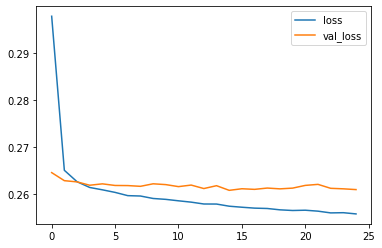

In [68]:
losses = pd.DataFrame(classifier.history.history)

losses.plot()

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = classifier.predict_classes(X_test)

print(classification_report(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [70]:
# Model's accuracy is 0.89. Not great not terrible. A model's accuracy that ALWAYS 
# predicts that one would pay the load is 80% (bottom threshold)
# the true indicator of whether the model is good enough is the f1-score of 0 ('charged off'; 0.61)

loan['loan_repaid'].value_counts()[1]/len(loan)

0.8038479931379817

In [71]:
confusion_matrix(y_test, predictions)

array([[ 7019,  8639],
       [  238, 63148]])

In [72]:
# check model for new customer

import random
random.seed(101)
random_ind = random.randint(0, len(loan))

new_customer = loan.drop('loan_repaid', axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [73]:
new_customer = scaler.transform(new_customer.values.reshape(1, X_train.shape[1]))

In [74]:
classifier.predict_classes(new_customer) # HE/SHE 'LL PAY IT

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [75]:
loan.iloc[random_ind]['loan_repaid'] == classifier.predict_classes(new_customer)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[ True]])

In [208]:
# Kewl

## Keras-tuner and cross validation

In [112]:
## Let's try something different...

num_fc_layers_min  = 1
num_fc_layers_max  = 2


def reg_wrapper(type, value):
    if type == 'l2':
        return regularizers.l2(value)
    if type == 'l1':
        return regularizers.l1(value)


def build_classifier(hp):

  classifier = Sequential()
  # Flatten
  classifier.add(Flatten(input_shape =( X_train.shape[1],)))
  # First Hidden Layer
  classifier.add(Dense(units=hp.Choice('units',[X_train.shape[1]]),
                      activation='relu'))
  
  classifier.add(Dropout(hp.Choice('dropout',[0.2,0.4,0.5])))
  #classifier.add(BatchNormalization())
  
  for i in range(hp.Int('num_fc_layers',min_value=num_fc_layers_min-1,max_value=num_fc_layers_max)):
    classifier.add(Dense(units=hp.Choice('num_units_'+str(i+1),[32,64]), 
                        activation='relu'
                        ,kernel_regularizer= reg_wrapper(hp.Choice('type', ['l1', 'l2']), 
                                                             hp.Choice('reg_value', 
                                                                       [0.01, 0.001, 0.1]))
                        ))
    classifier.add(Dropout(hp.Choice('dropout_'+str(i+1),[0.2,0.4,0.5])))
    
   # classifier.add(BatchNormalization()) 
    
  # Output Layer
  classifier.add(Dense(units=1, activation='sigmoid'))
  #Compiling the neural network
  classifier.compile(optimizer=tf.keras.optimizers.RMSprop(hp.Choice('learning_rate',
                                                              values=[1e-2, 1e-3, 1e-4])),
                    loss=tf.keras.losses.mean_squared_error,
                    metrics=['mse','mae'])
  
  return classifier

In [77]:
!pip install -U keras-tuner

     |████████████████████████████████| 71kB 5.2MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=9404d492a9c5b5bd91d90e9cfadb806f2a4023b6e6293aa1d4779204cd0dee12
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=13b17f1938d5b963c1d02a2f9993adb39e73750e119dea12d9370bd1cef7032a
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [109]:
from sklearn.model_selection import KFold

from kerastuner import oracles, Objective
import kerastuner

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers, optimizers

In [113]:
from tensorflow.keras.layers import Dense,Dropout,Flatten, BatchNormalization


class CVTuner(kerastuner.engine.tuner.Tuner):
  def run_trial(self, trial, x, y, batch_size=256, epochs=1):
    cv = KFold(5)
    #loo = LeaveOneOut()
    val_losses = []
    for train_indices, test_indices in cv.split(x):

      X_train, X_test = X[train_indices], X[test_indices]
      y_train, y_test = y[train_indices], y[test_indices]

      # scale splits
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)

      model = self.hypermodel.build(trial.hyperparameters)
      model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 0)
      val_losses.append(model.evaluate(X_test, y_test))
      
    self.oracle.update_trial(trial.trial_id, {'val_loss': np.mean(val_losses)})
    self.save_model(trial.trial_id, model)


In [114]:
tuner_cv = CVTuner(
    hypermodel=build_classifier,
    oracle=kerastuner.oracles.BayesianOptimization(
    objective='val_loss',
    max_trials=20),
    project_name='Tuner')

tuner_cv.search(x = X,
             y = y,
             epochs=30,
             batch_size=256)

import warnings
warnings.filterwarnings('ignore')

Trial 20 Complete [00h 05m 42s]
val_loss: 0.10831377506256104

Best val_loss So Far: 0.1077070971330007
Total elapsed time: 02h 10m 26s
INFO:tensorflow:Oracle triggered exit


In [115]:
best_model = tuner_cv.get_best_models(num_models=1)[0]

In [117]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 78)                0         
_________________________________________________________________
dense (Dense)                (None, 78)                6162      
_________________________________________________________________
dropout (Dropout)            (None, 78)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2528      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 8,723
Trainable params: 8,723
Non-trainable params: 0
______________________________________________________

In [120]:
best_model.predict_classes(new_customer) # HE/SHE 'LL PAY IT

array([[1]], dtype=int32)

In [121]:
loan.iloc[random_ind]['loan_repaid'] == best_model.predict_classes(new_customer)

array([[ True]])